### Voronoi Optimistic Optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util import cos_exp_square_nd,plot_line,x_sampler,get_best_xy,r_sq,sample_from_best_voronoi_cell
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
np.set_printoptions(precision=3)
print ("Packages Loaded.")

Packages Loaded.


In [2]:
def func_eval(x): # x:[n x d]
    y = cos_exp_square_nd(x)
    return y # y:[n x 1]

### Target Cost Function

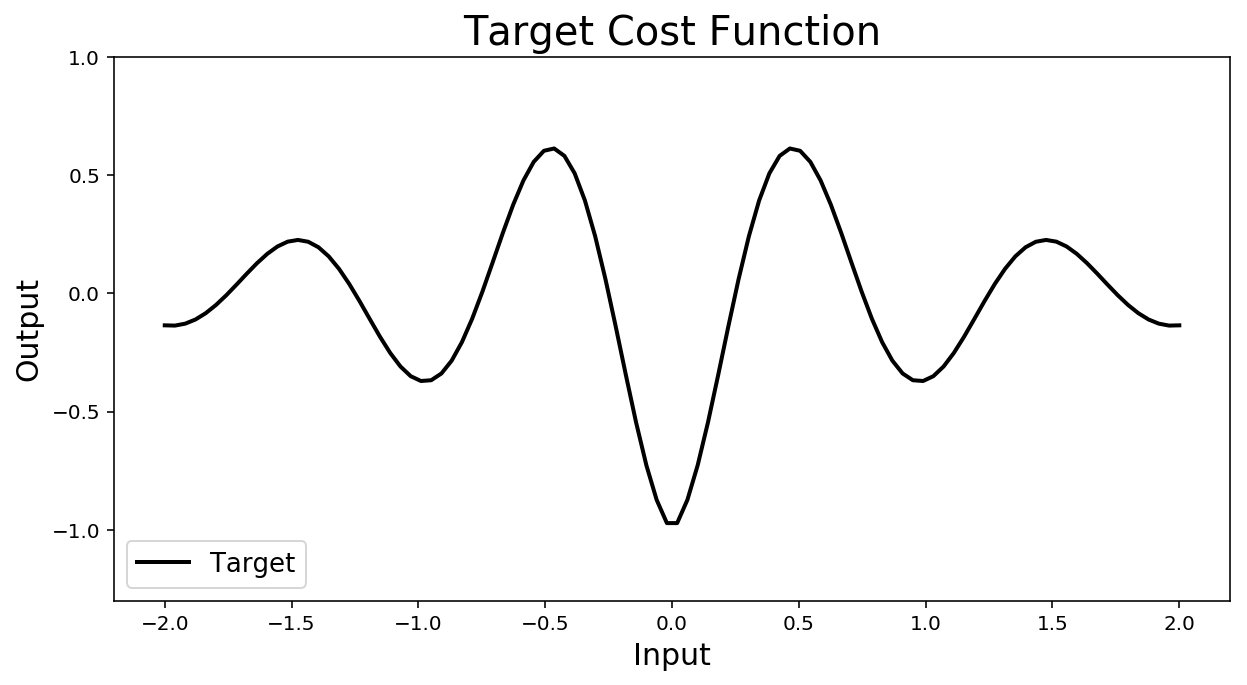

In [3]:
xmin,xmax = -2,2
x_target = np.linspace(start=xmin,stop=xmax,num=100).reshape((-1,1))
y_target = func_eval(x_target)
plot_line(
    x_target,y_target,fmt='-',lc='k',lw=2,label='Target',
    figsize=(10,5),xstr='Input',xfs=15,ystr='Output',yfs=15,tstr='Target Cost Function',tfs=20,
    ylim=[-1.3,+1],
    lfs=13,lloc='lower left')

### VOO

In [4]:
seed,x_minmax = 1,np.array([[xmin,xmax]])
max_step = 15

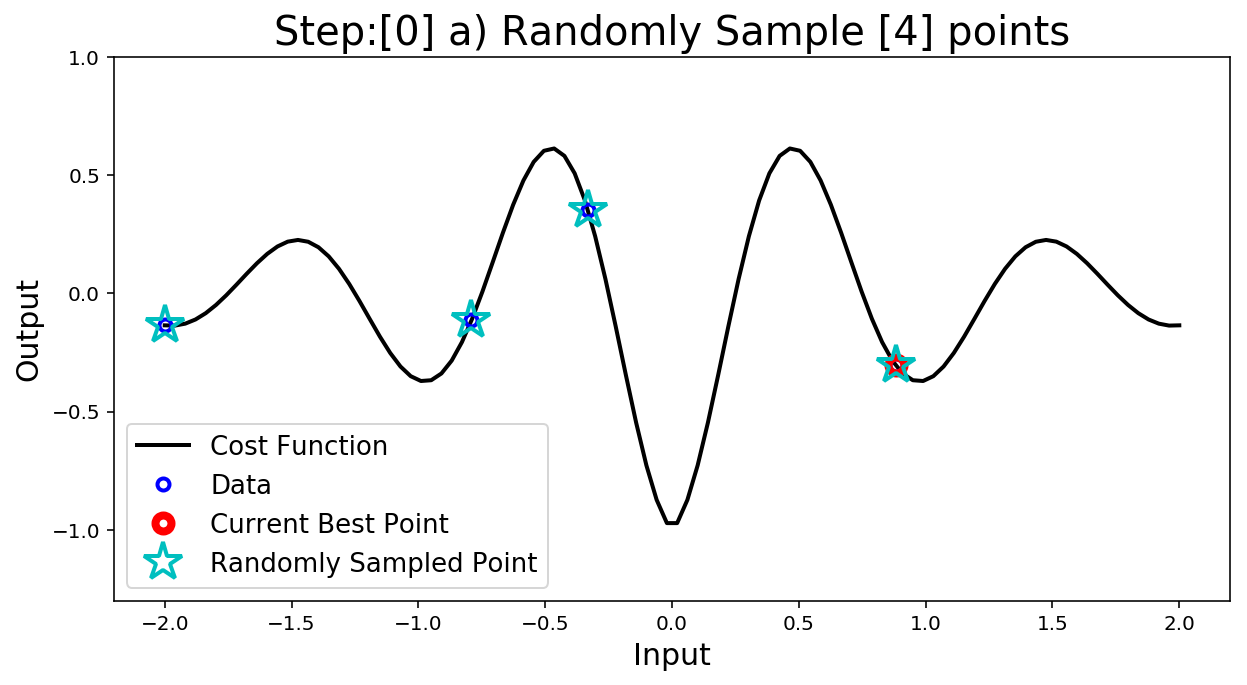

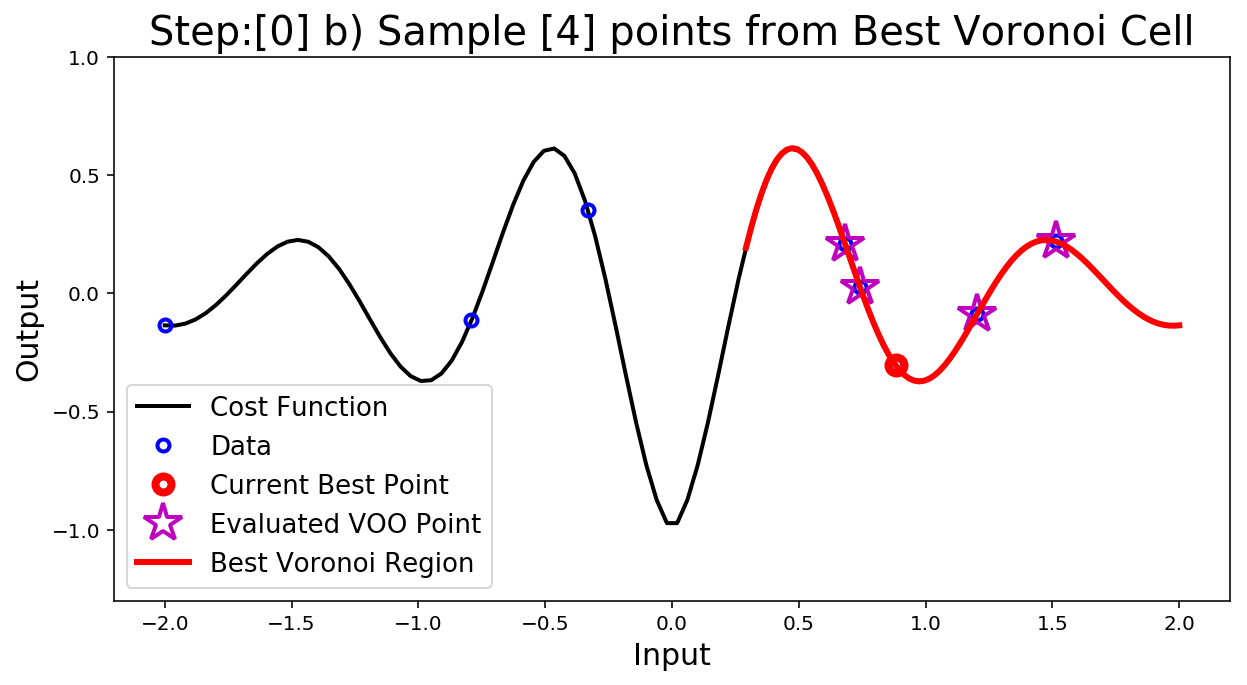

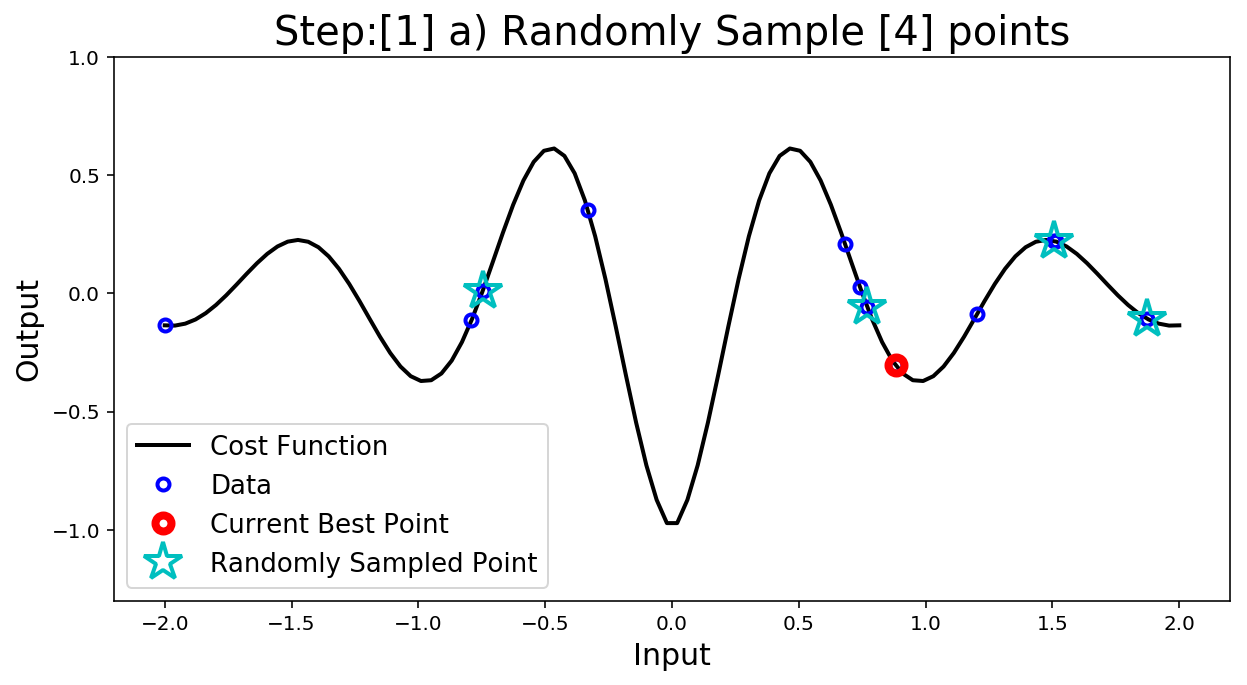

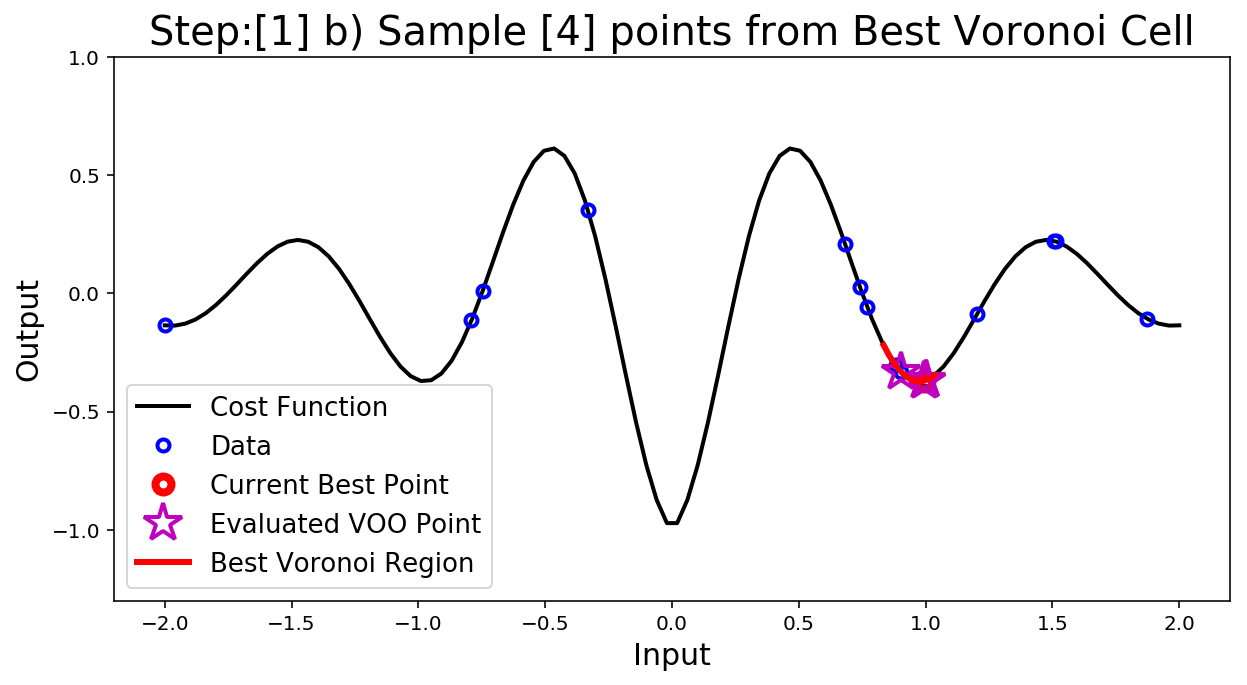

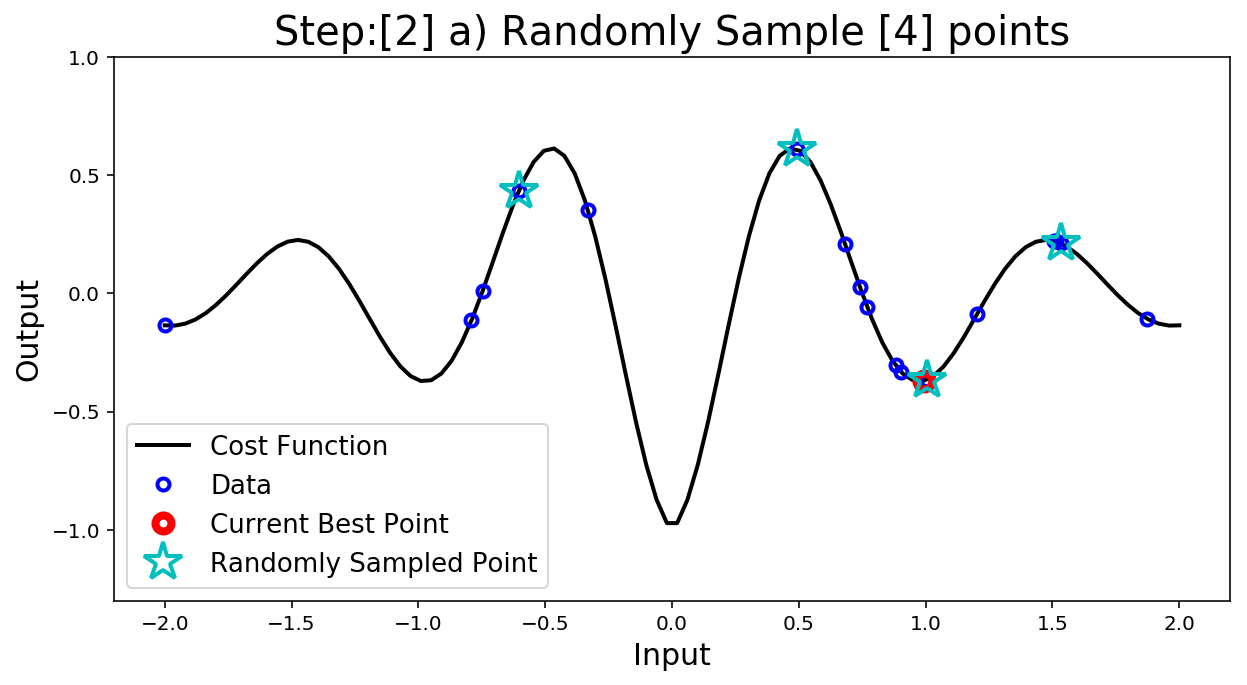

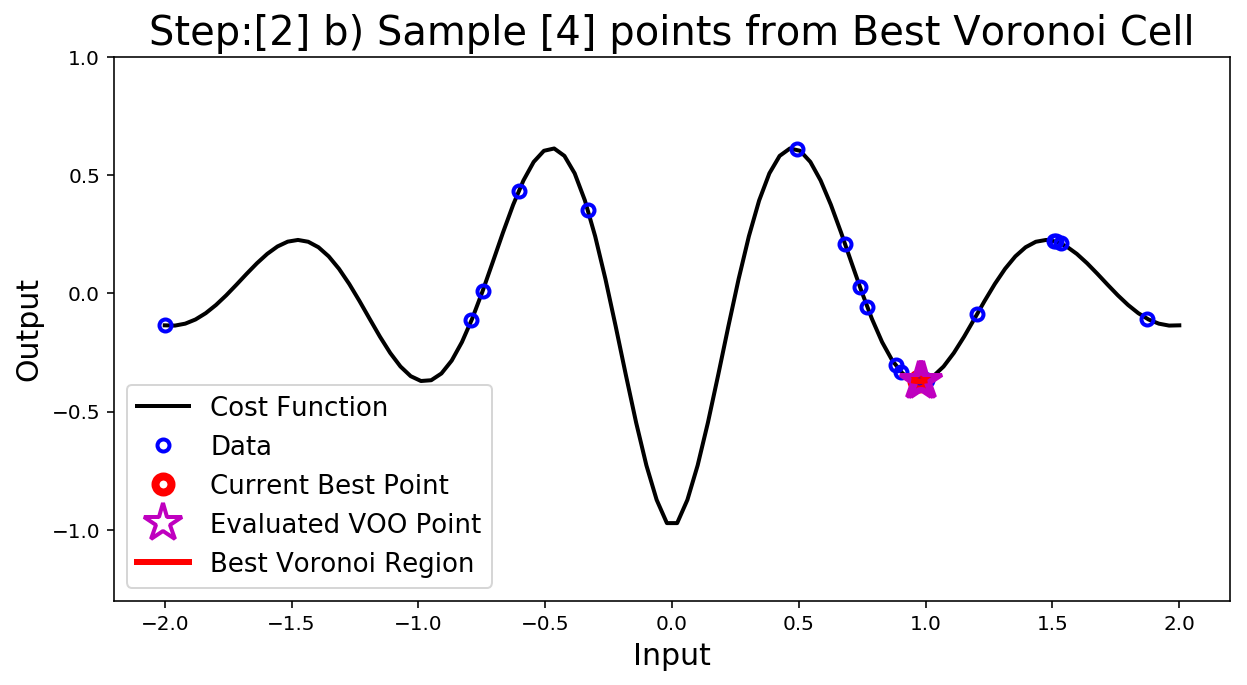

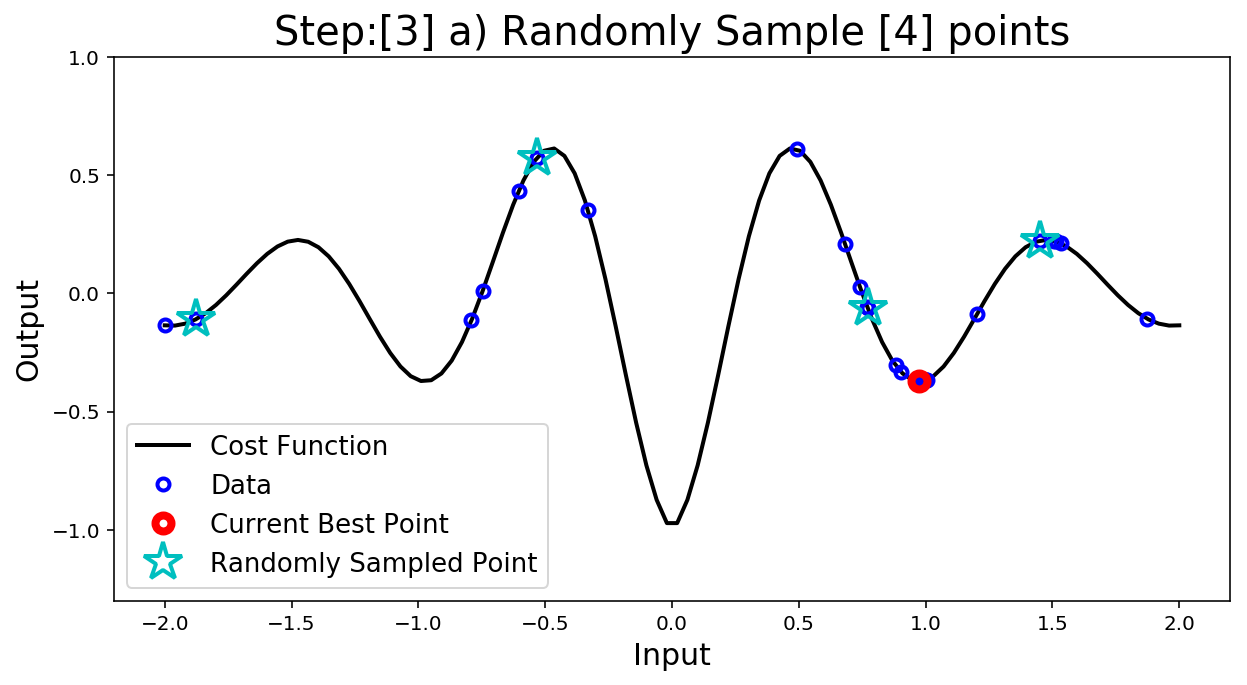

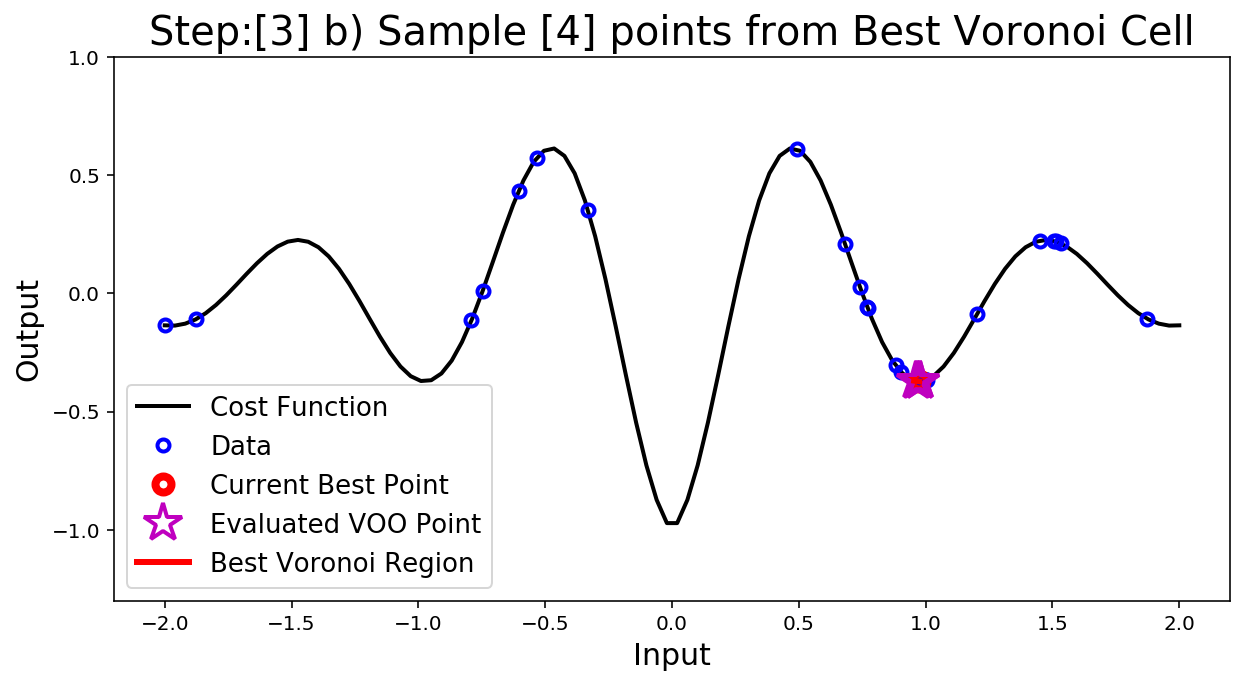

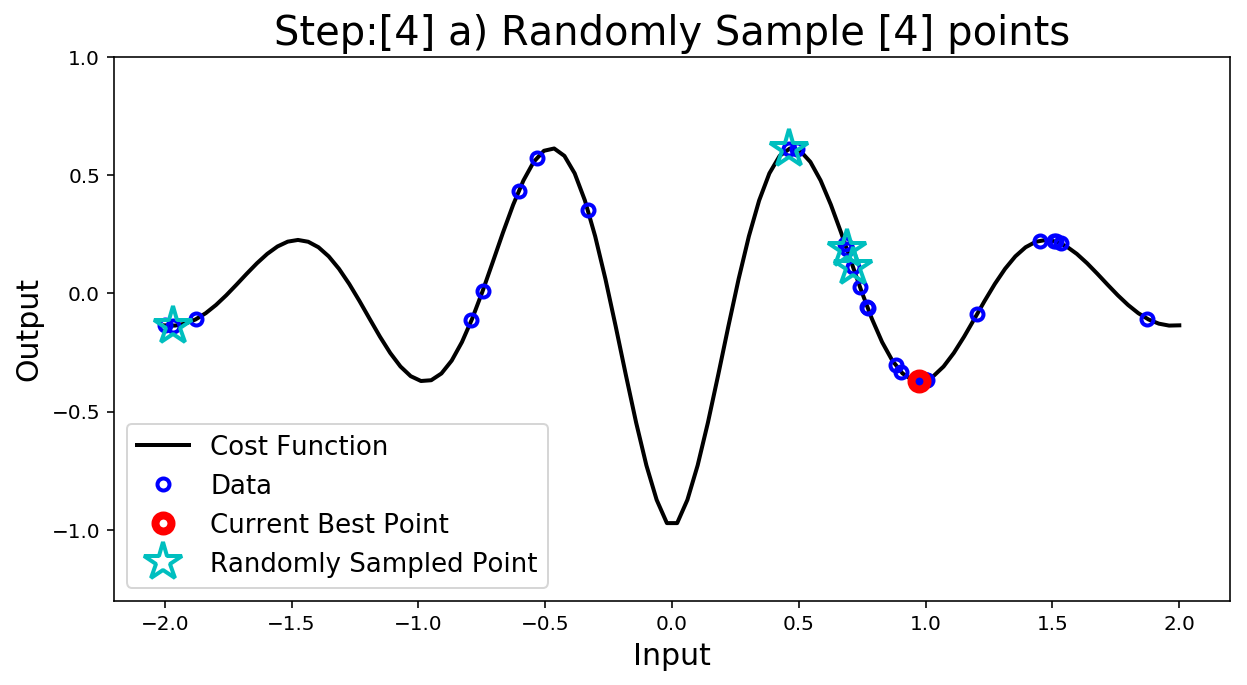

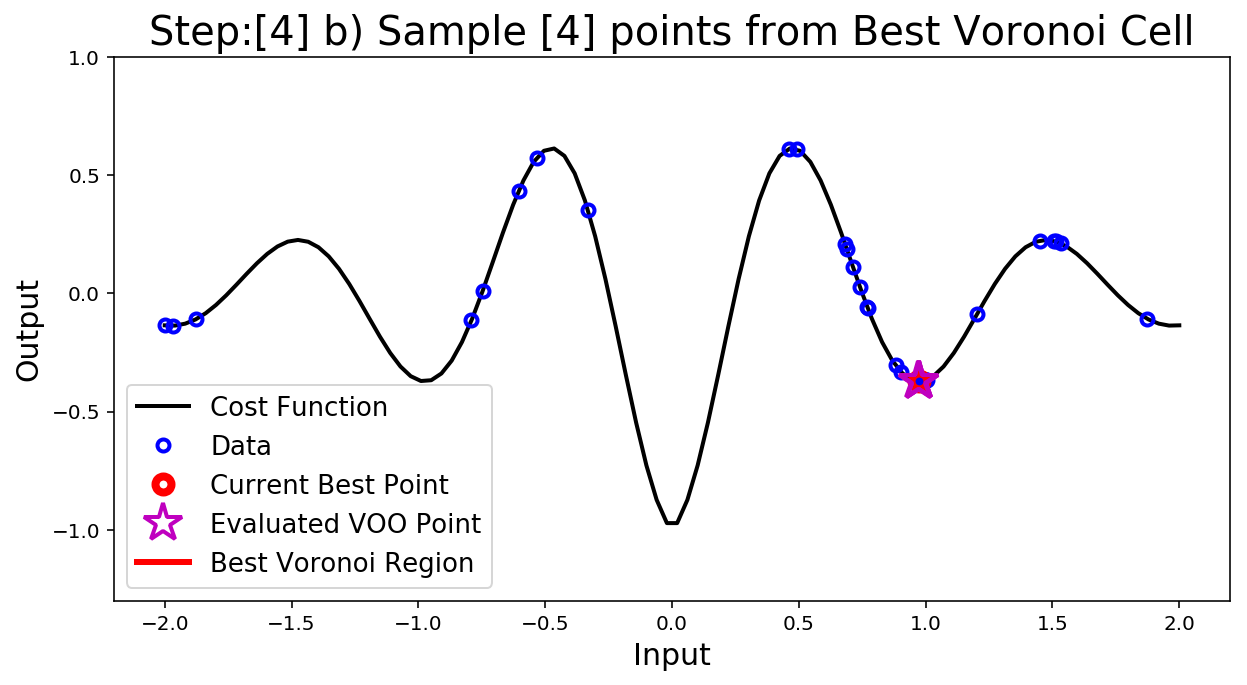

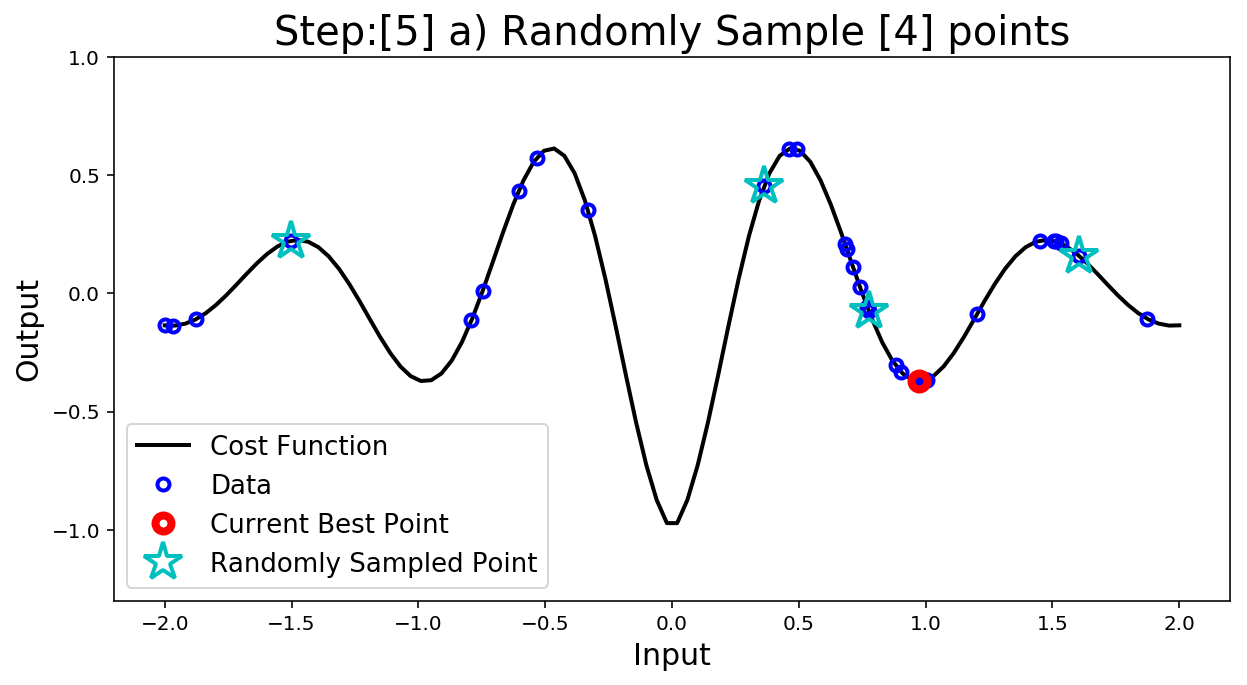

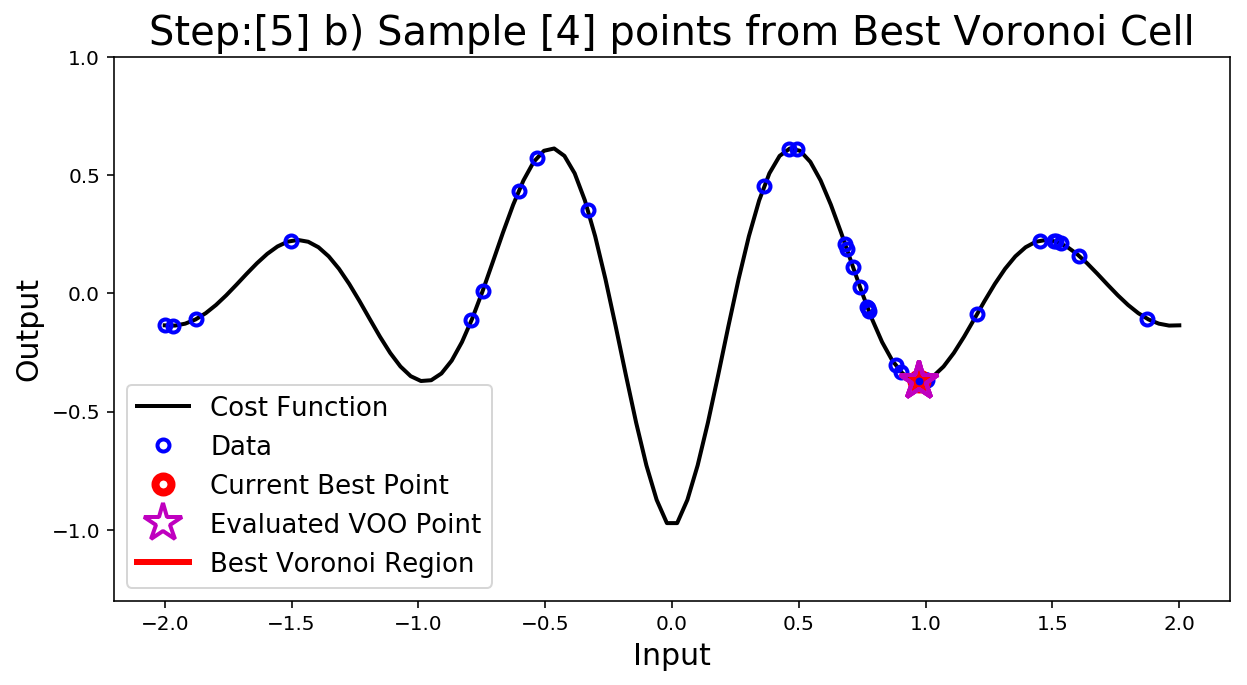

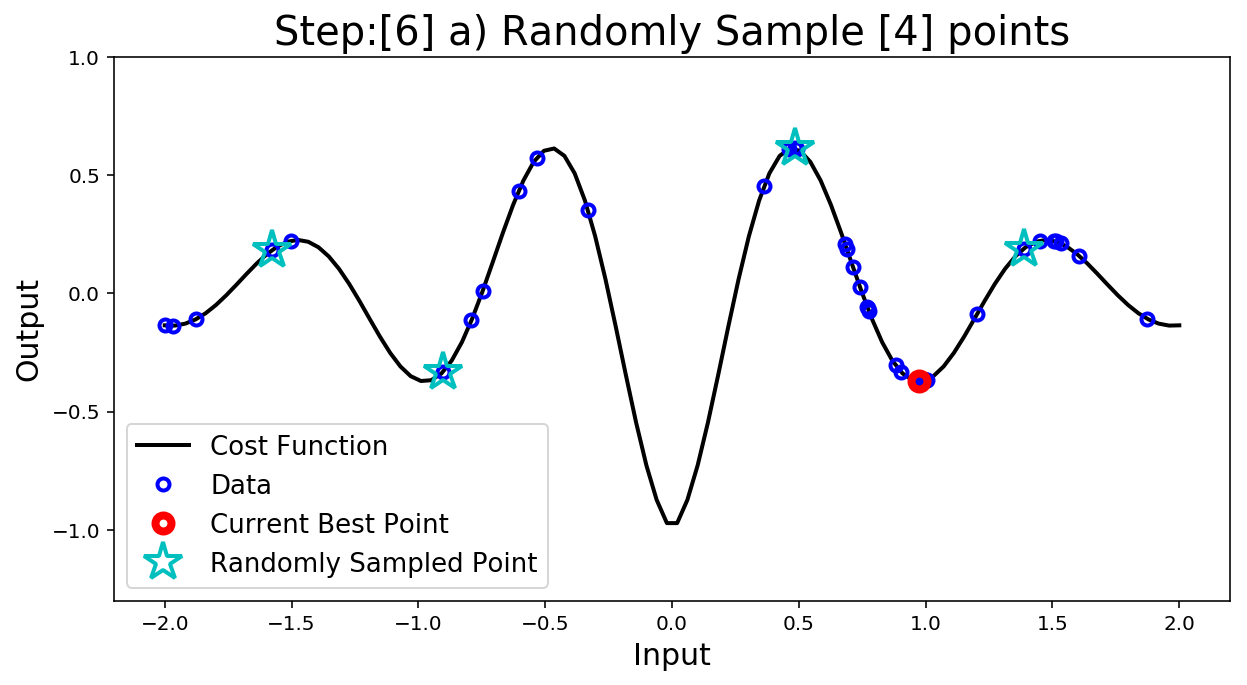

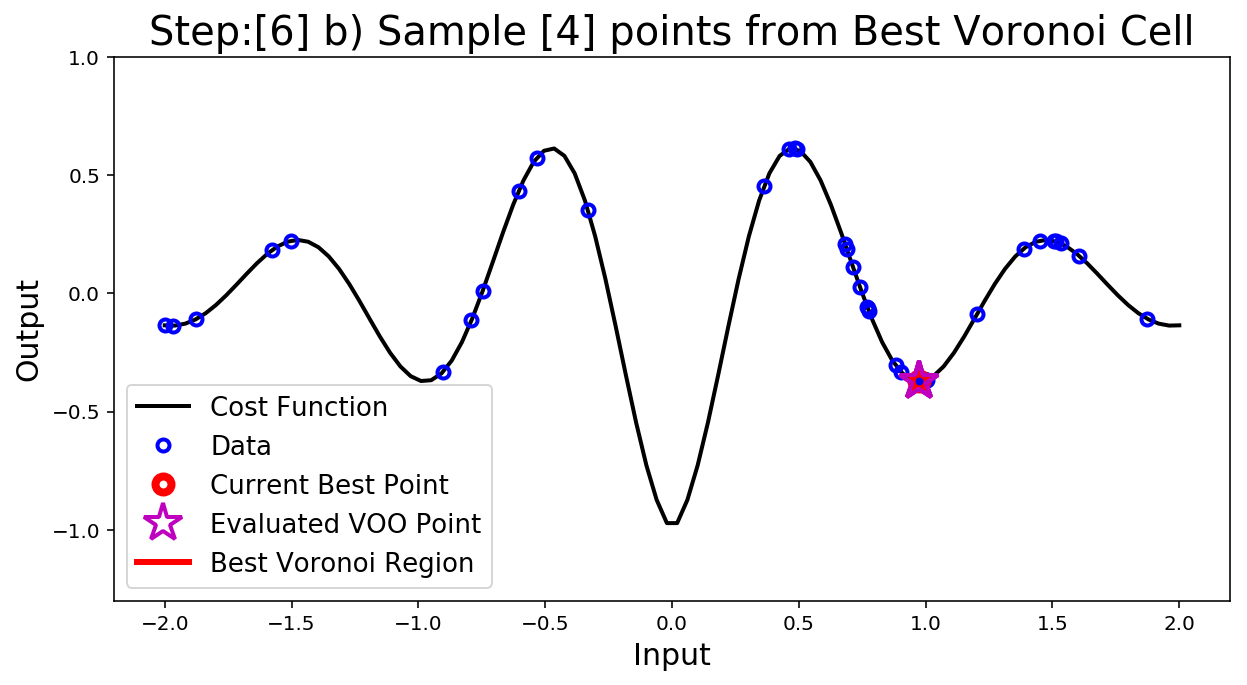

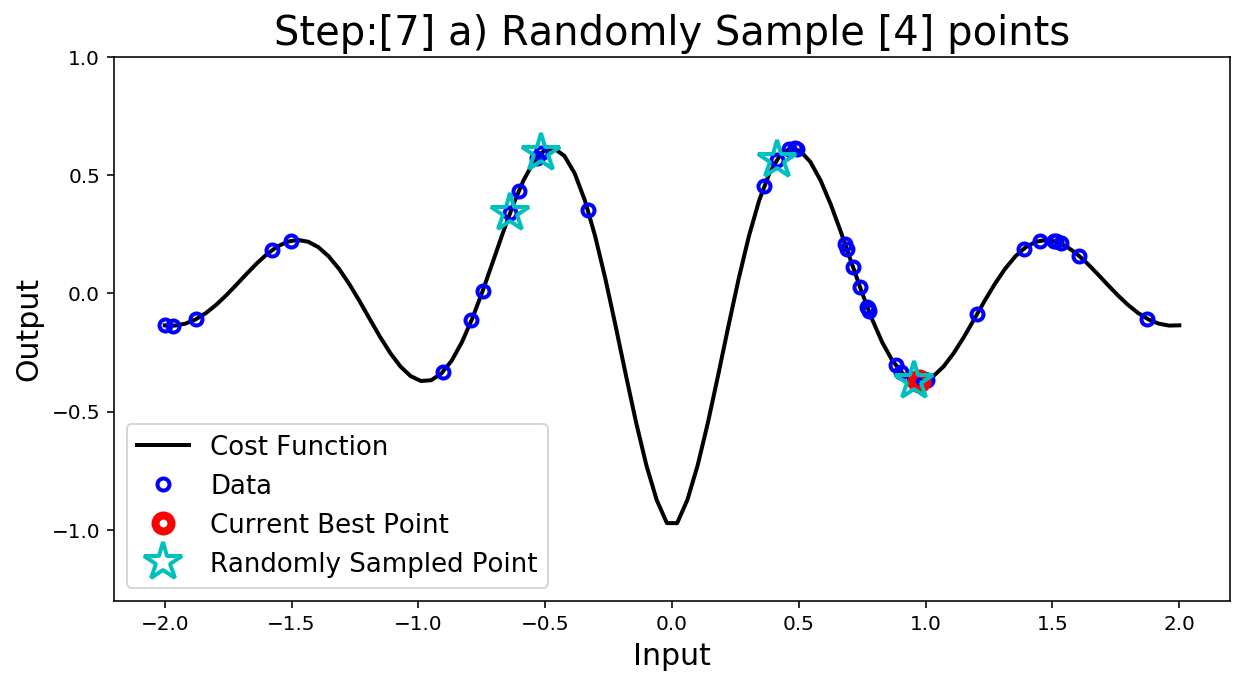

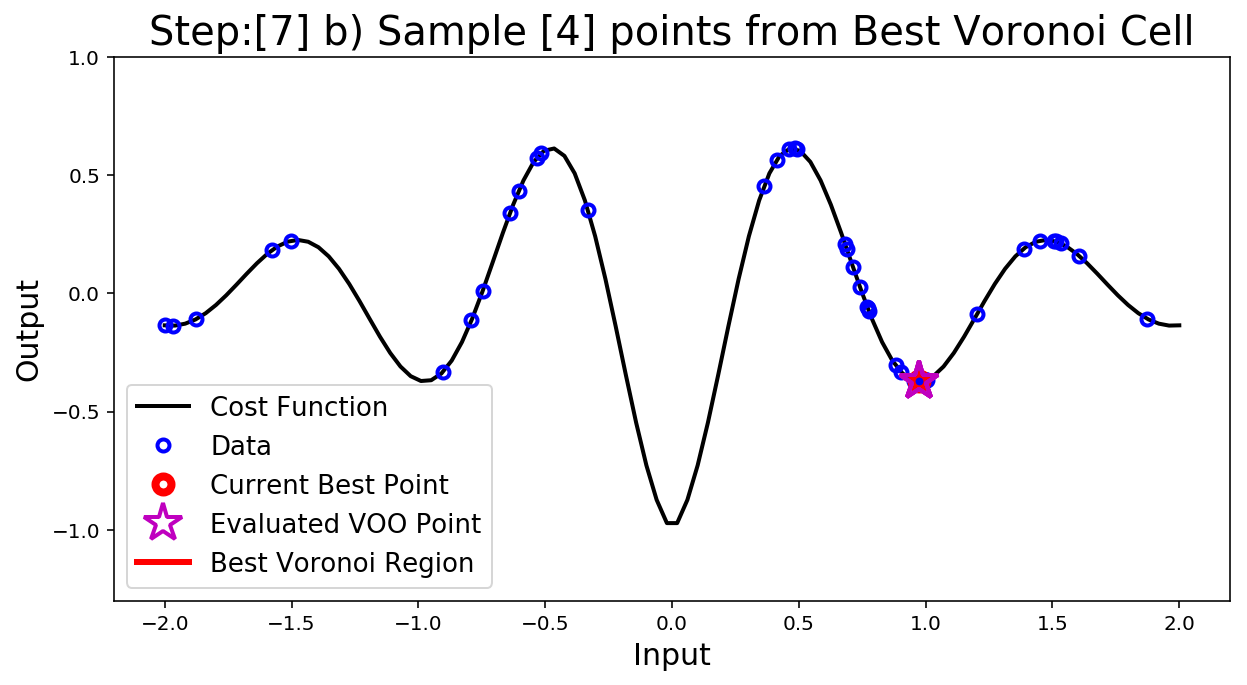

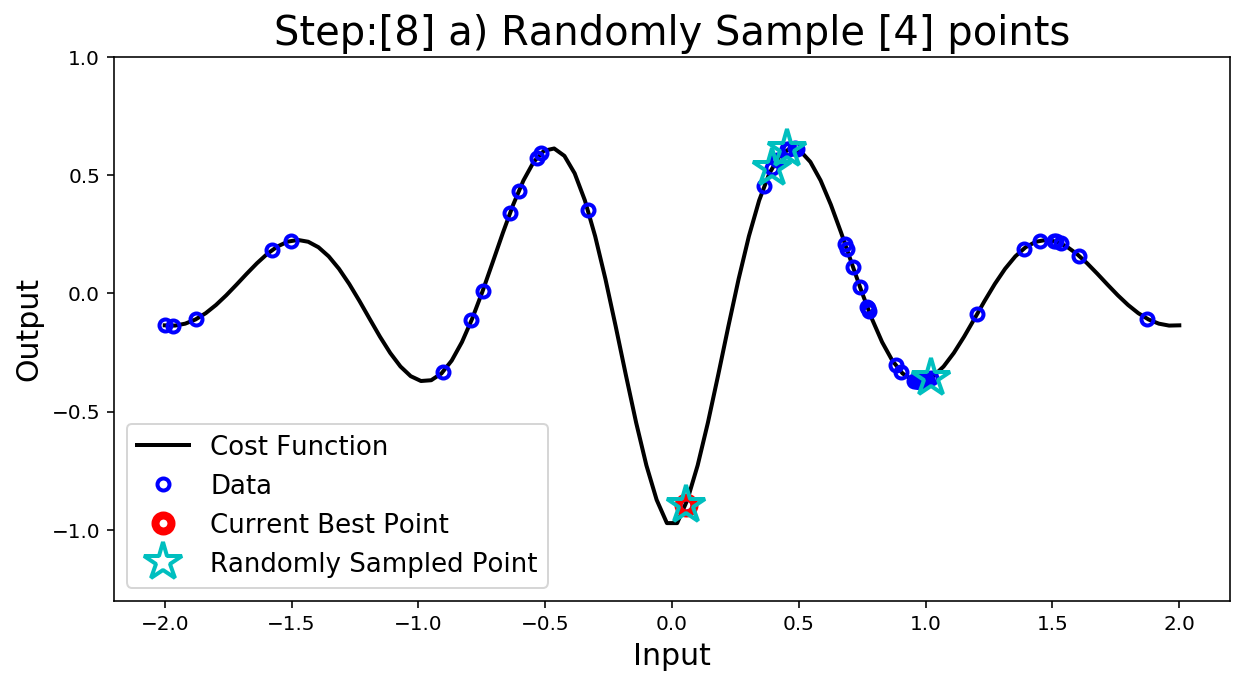

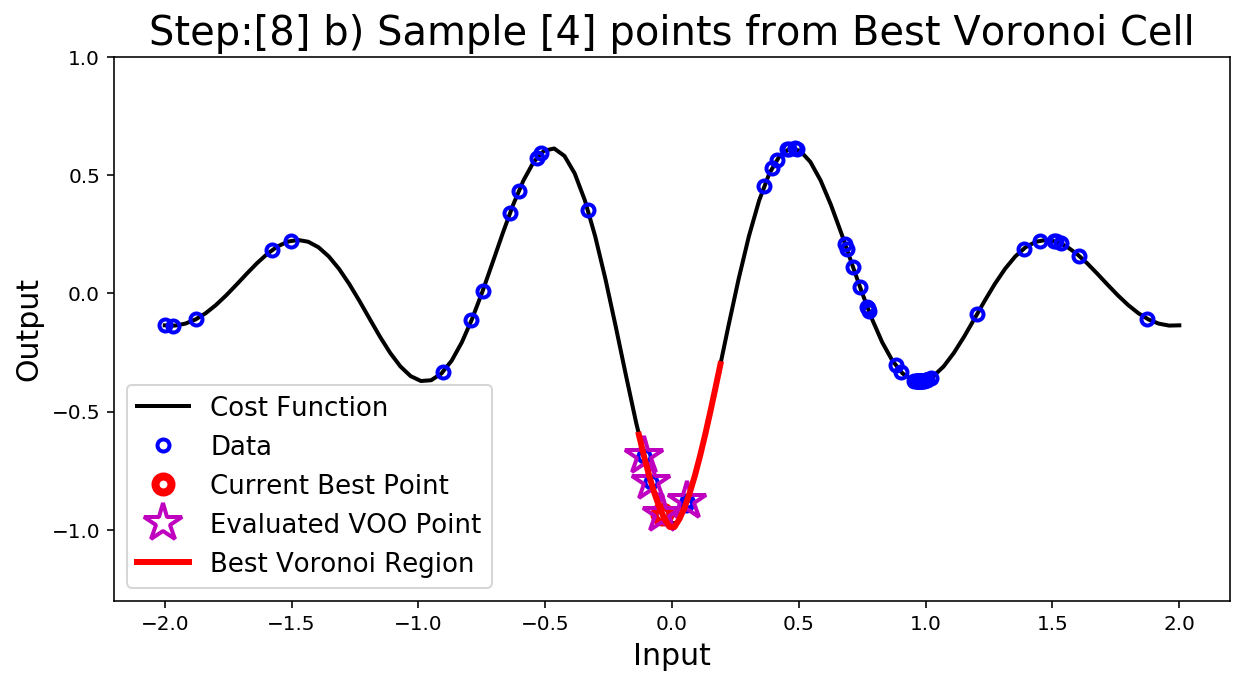

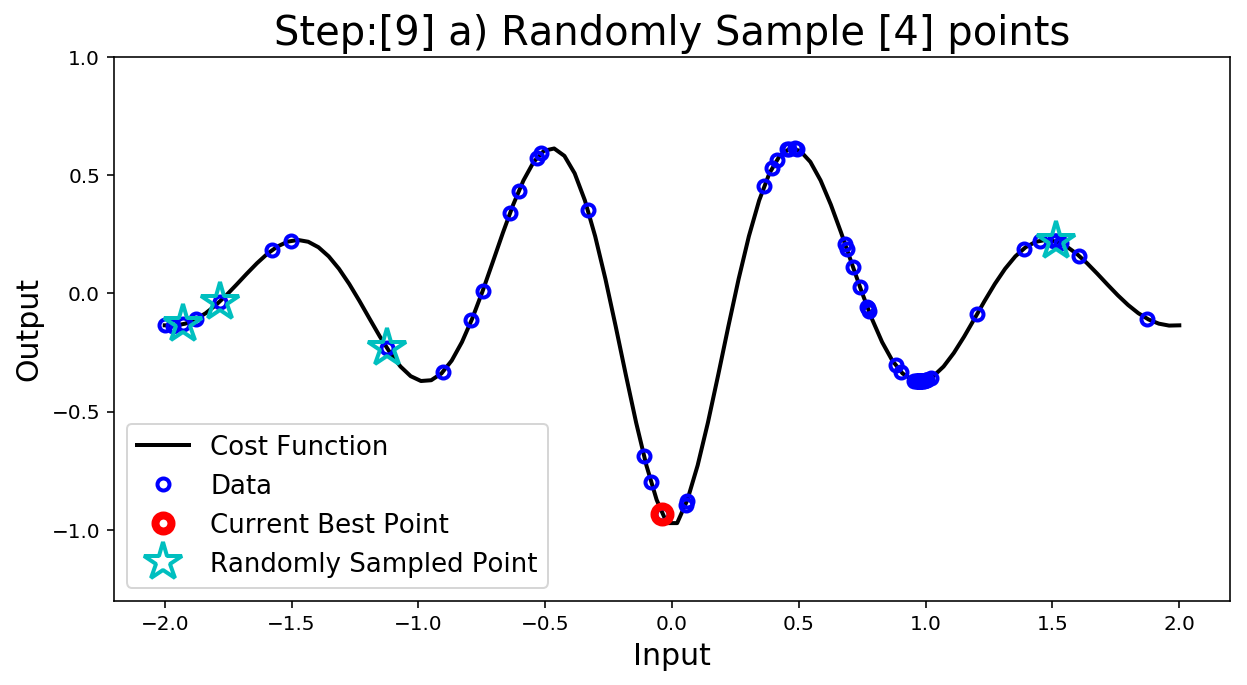

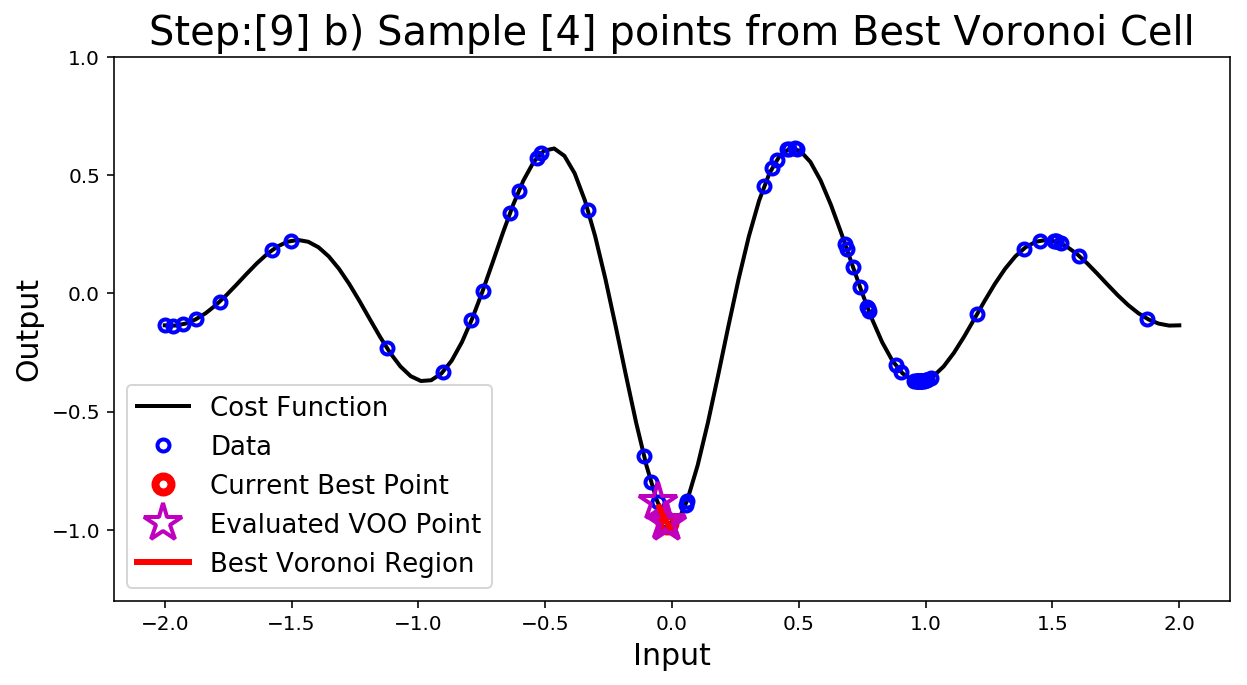

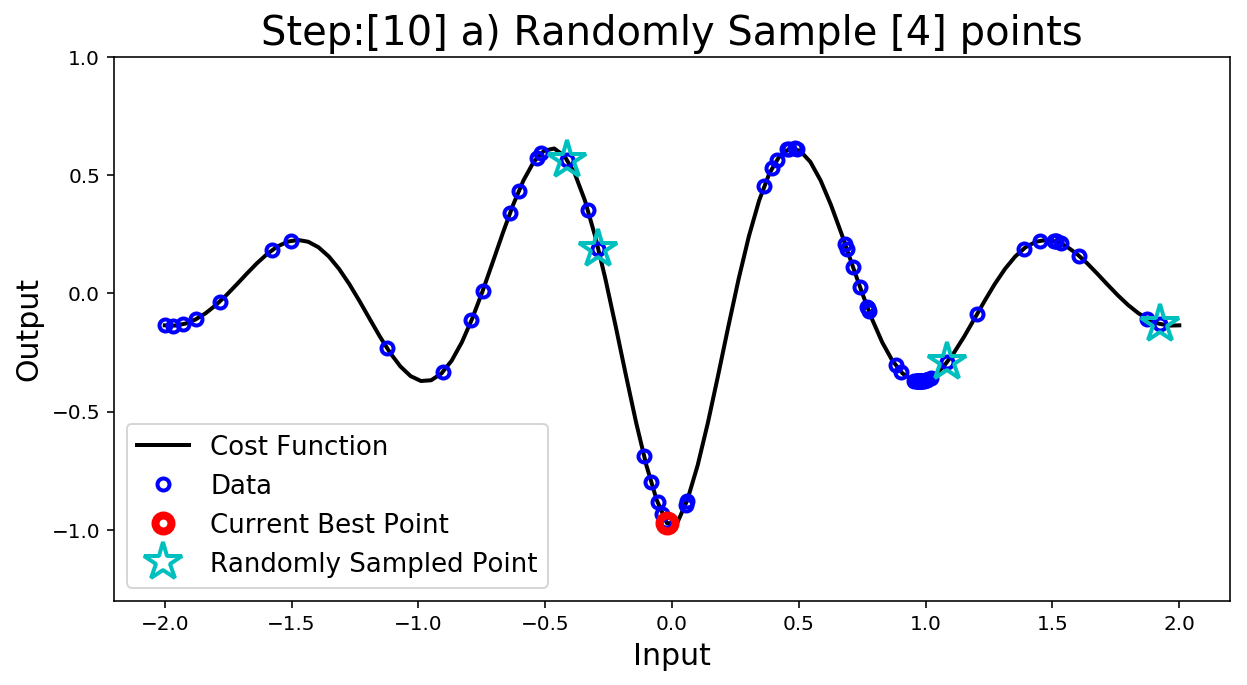

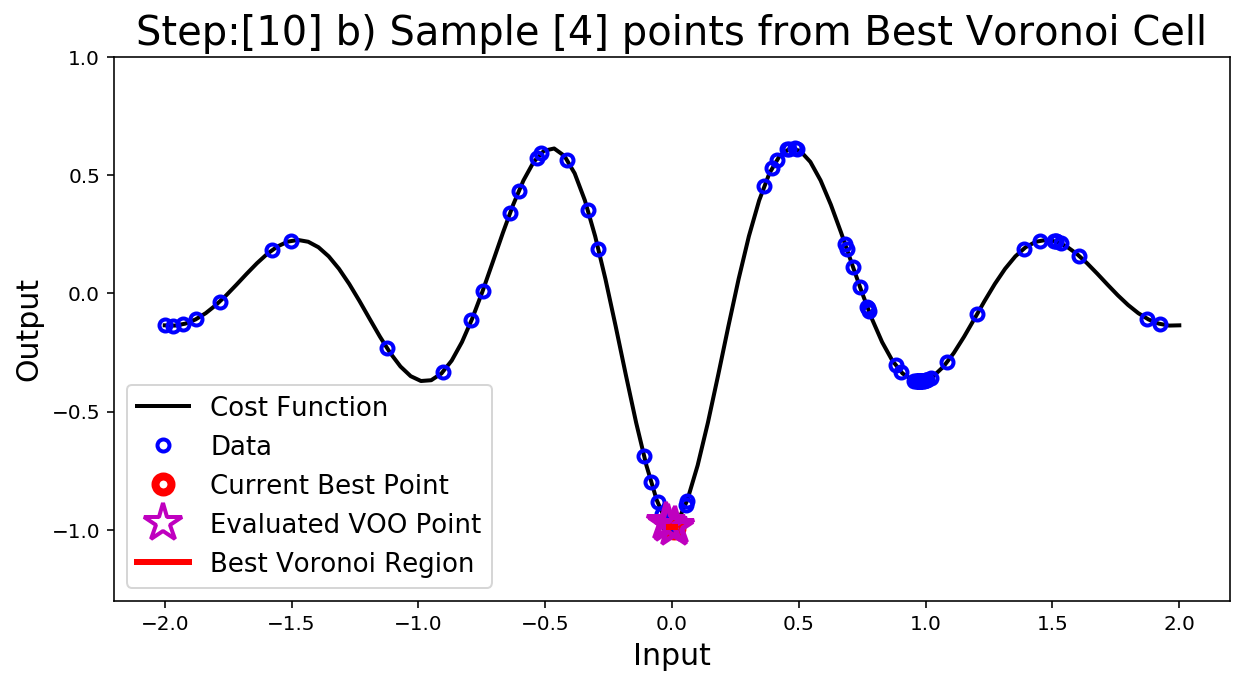

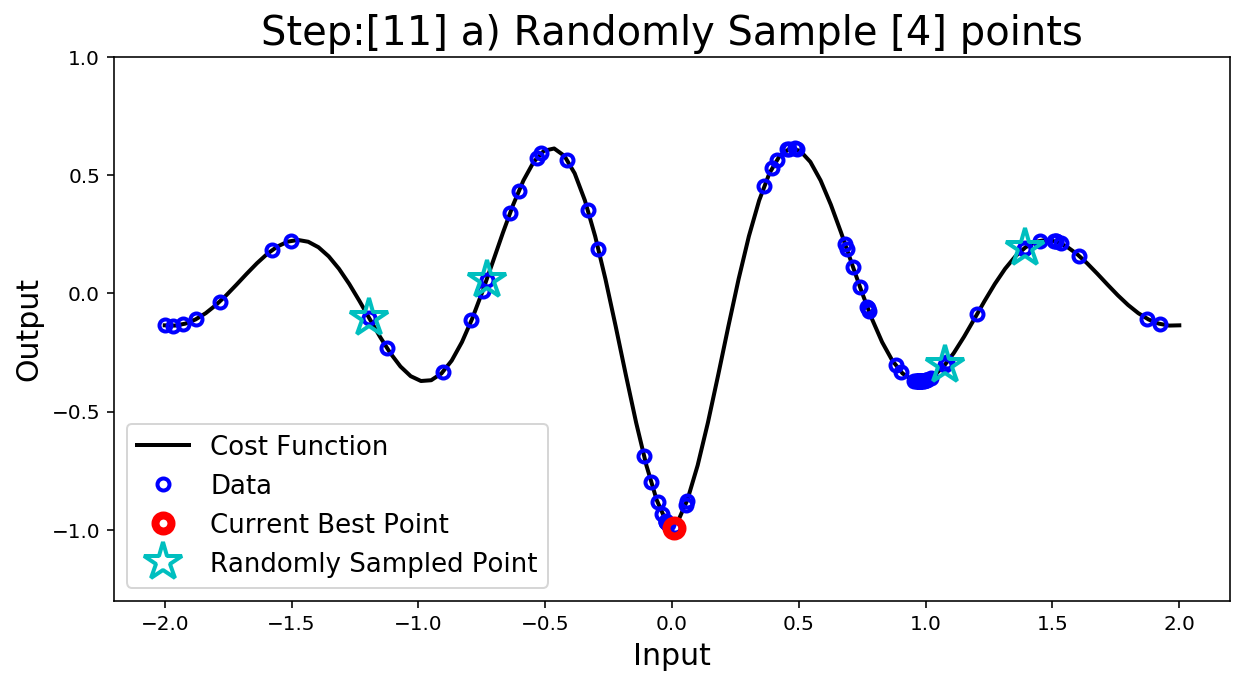

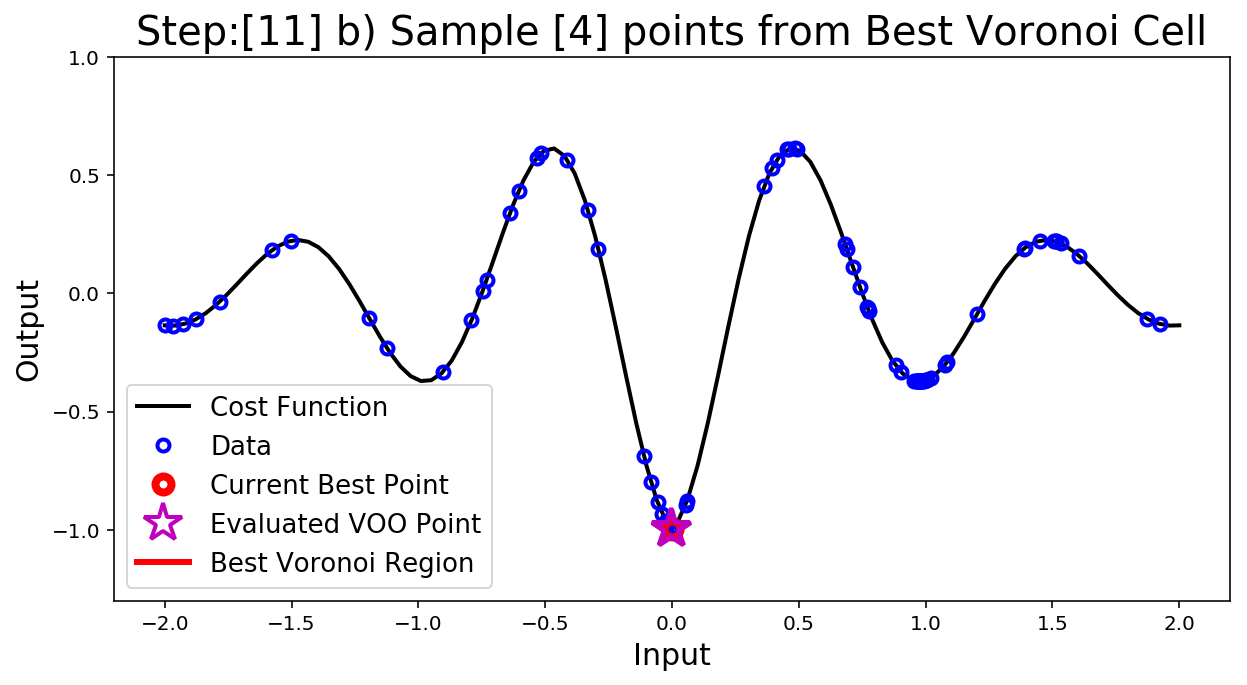

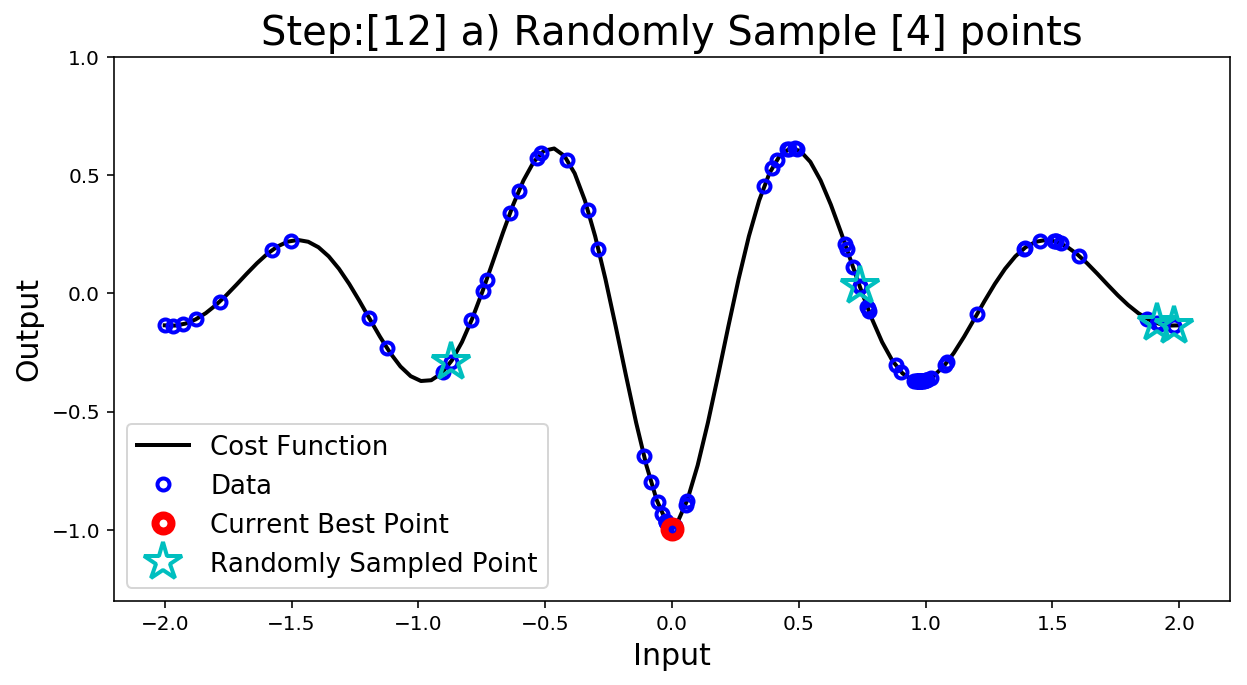

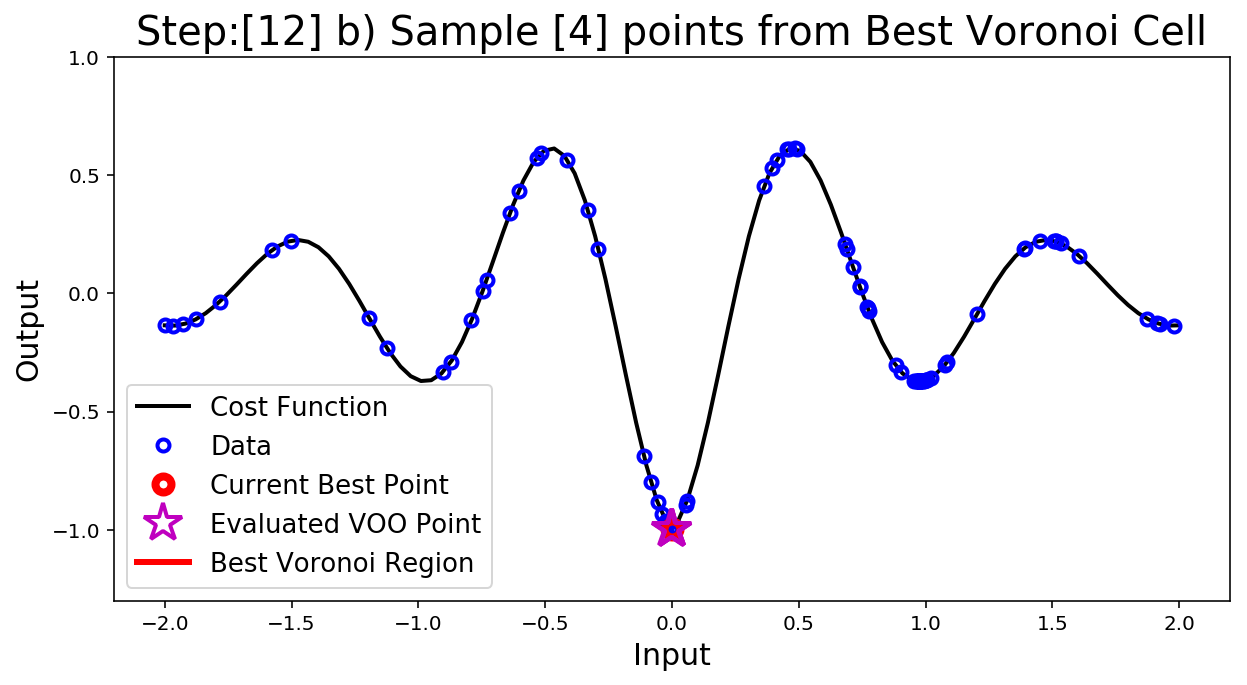

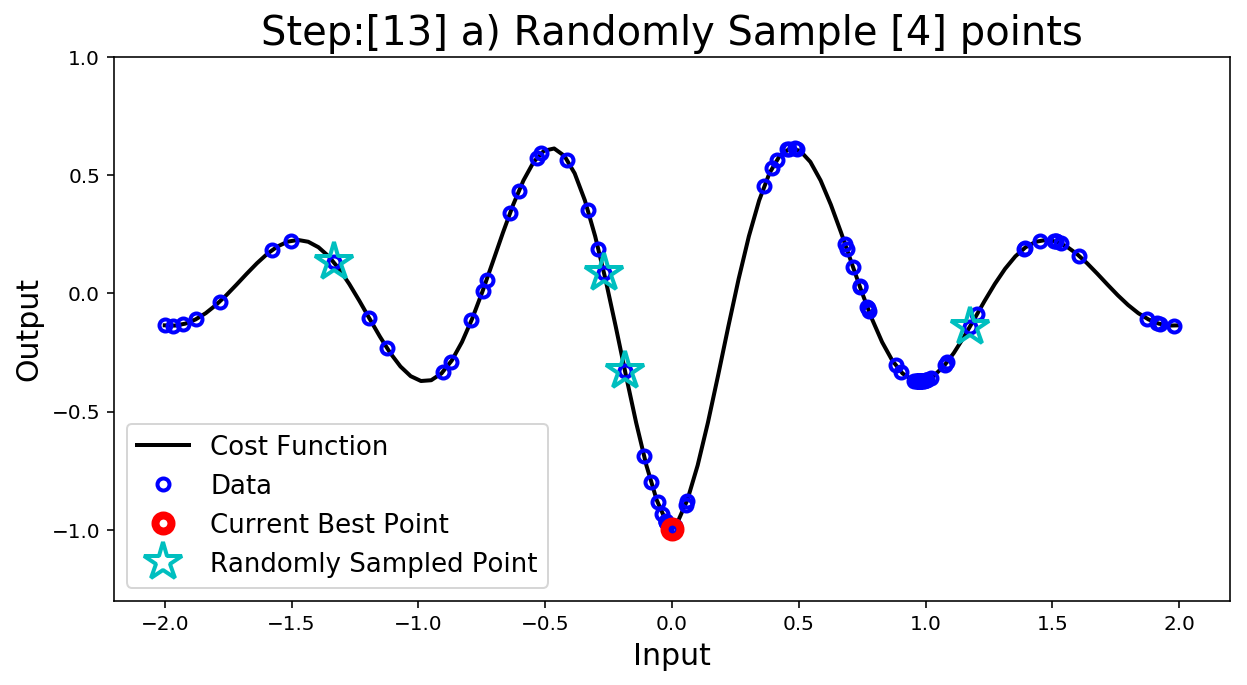

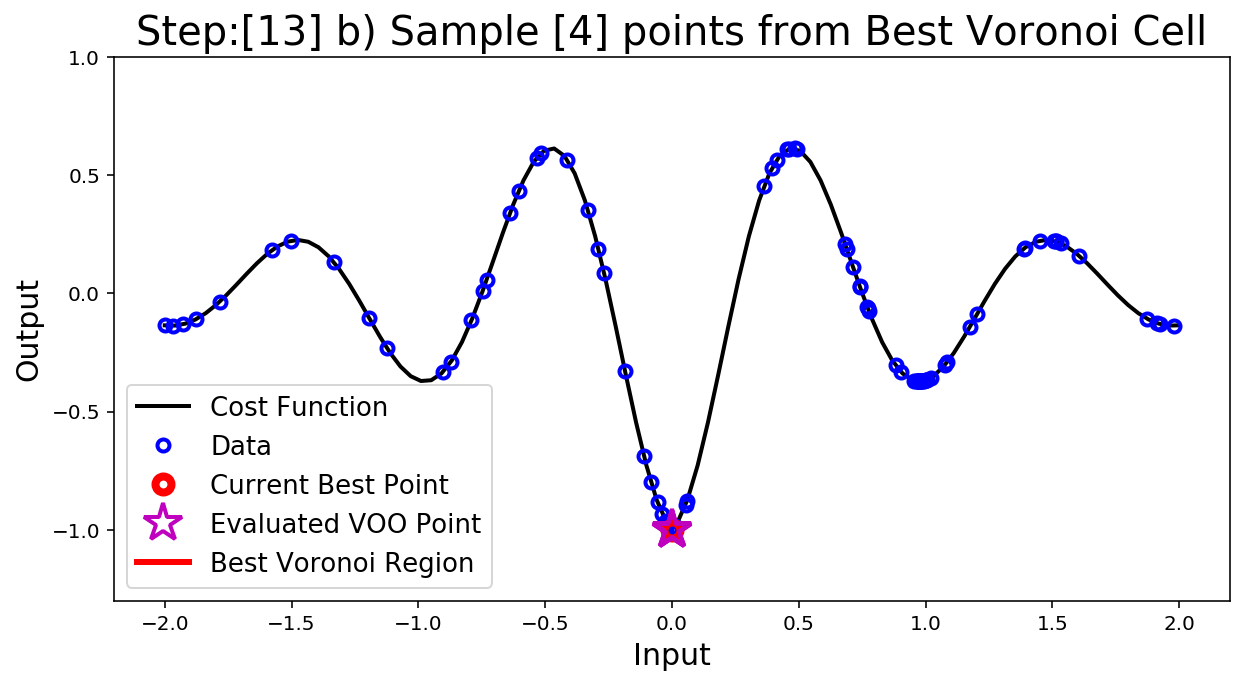

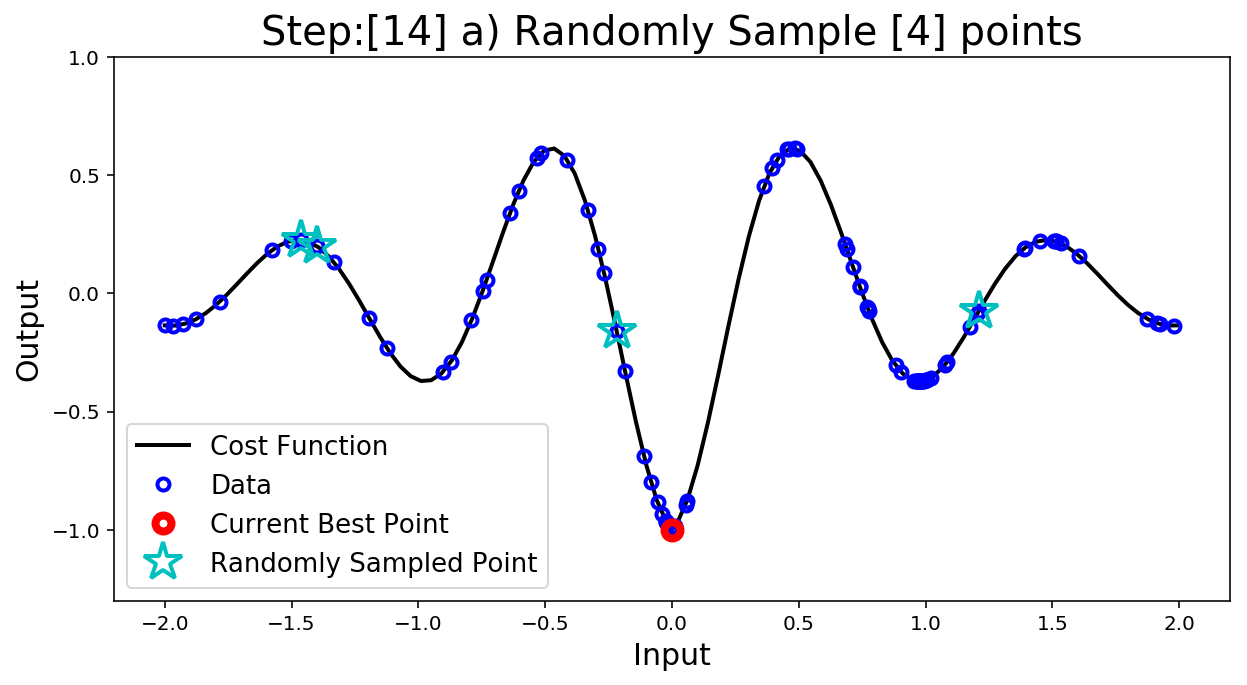

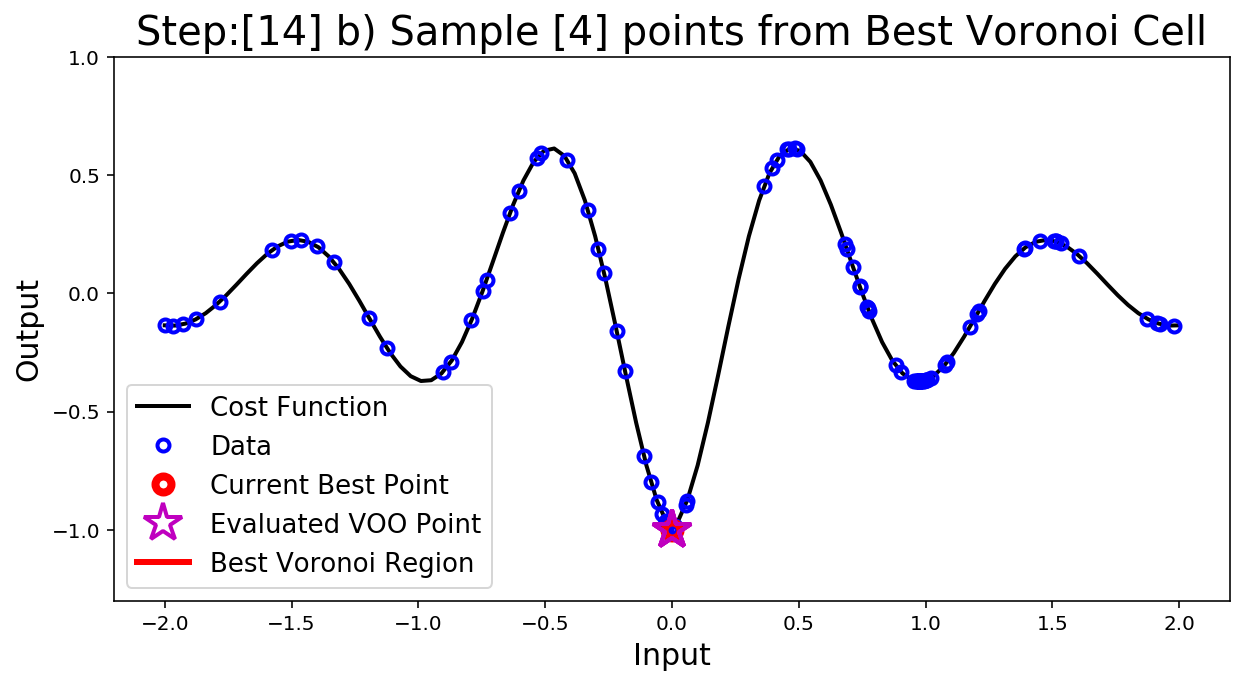

Done.


In [9]:
np.random.seed(seed=seed) # fix random seed 
xdim = x_minmax.shape[0]
x_data,y_data = np.zeros((0,xdim)),np.zeros((0,1))
for it in range(max_step):
    # Random sampling
    n_sample_random = 4
    x_evals = x_sampler(n_sample=n_sample_random,x_minmax=x_minmax)
    y_evals = [func_eval(x=x_eval) for x_eval in x_evals] 
    x_evals,y_evals = np.asarray(x_evals)[:,0,:],np.asarray(y_evals)[:,0,:] # reshape
    x_data,y_data = np.concatenate((x_data,x_evals),axis=0),np.concatenate((y_data,y_evals),axis=0) # concatenate
    x_sol,y_sol = get_best_xy(x_data,y_data)
    plot_line(
        x_target,y_target,fmt='-',lc='k',lw=2,label='Cost Function',
        x2=x_data,y2=y_data,fmt2='o',lc2='b',mew2=2,ms2=6,label2='Data',
        x3=x_sol,y3=y_sol,fmt3='o',lc3='r',mew3=4,ms3=8,label3='Current Best Point',
        x4=x_evals,y4=y_evals,fmt4='*',lc4='c',mew4=2,ms4=20,label4='Randomly Sampled Point',
        figsize=(10,5),xstr='Input',xfs=15,ystr='Output',yfs=15,
        tstr='Step:[%d] a) Randomly Sample [%d] points'%(it,n_sample_random),tfs=20,
        ylim=[-1.3,+1],
        lfs=13,lloc='lower left')
    
    # Get the best voronoi region in 1D
    n_test = 200
    x_test = np.linspace(start=xmin,stop=xmax,num=n_test).reshape((-1,1))
    y_test = func_eval(x_test)
    idx_min = np.argmin(y_data) # index of the best x
    dist_sq = r_sq(x_data,x_test)
    idx_test = (np.argmin(dist_sq,axis=0)==idx_min)
    # Sample from the Best Voronoi Cell
    n_sample_sbv,max_try_sbv = 4,5000
    x_evals = sample_from_best_voronoi_cell(
            x_data,y_data,x_minmax,n_sample=n_sample_sbv,max_try_sbv=max_try_sbv)
    y_evals = [func_eval(x=x_eval) for x_eval in x_evals]
    x_evals,y_evals = np.asarray(x_evals)[:,0,:],np.asarray(y_evals)[:,0,:] # reshape
    x_data,y_data = np.concatenate((x_data,x_evals),axis=0),np.concatenate((y_data,y_evals),axis=0) # concatenate
    x_sol,y_sol = get_best_xy(x_data,y_data)
    plot_line(
        x_target,y_target,fmt='-',lc='k',lw=2,label='Cost Function',
        x2=x_data,y2=y_data,fmt2='o',lc2='b',mew2=2,ms2=6,label2='Data',
        x3=x_sol,y3=y_sol,fmt3='o',lc3='r',mew3=4,ms3=8,label3='Current Best Point',
        x4=x_evals,y4=y_evals,fmt4='*',lc4='m',mew4=2,ms4=20,label4='Evaluated VOO Point',
        x5=x_test[idx_test,:],y5=y_test[idx_test,:],fmt5='-',lc5='r',lw5=3,label5='Best Voronoi Region',
        figsize=(10,5),xstr='Input',xfs=15,ystr='Output',yfs=15,
        tstr='Step:[%d] b) Sample [%d] points from Best Voronoi Cell'%(it,n_sample_sbv),tfs=20,
        ylim=[-1.3,+1],
        lfs=13,lloc='lower left')
print ("Done.")